In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('top_insta_influencers_data.csv')

In [3]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [15]:
def to_num(n):
    if 'k' in n:
        n = float(n.replace('k',''))
        n = n * 1000
        return n
    else:
        return n

In [17]:
df['posts'] = df['posts'].apply(to_num)

In [19]:
renamed_cols = {
    'channel_info': 'username'
}
df = df.rename(renamed_cols,axis=1)

In [24]:
df['country'] = df['country'].fillna('International')

In [25]:
df.head()

,rank,username,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6900.0,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,890.0,357.3m,6.8m,1.24%,4.4m,6.0b,International
3,4,selenagomez,93,1800.0,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6800.0,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [26]:
top_10 = df[['username','rank','country','posts']].sort_values('rank',ascending=True)[:10]

In [27]:
top_10

,username,rank,country,posts
0,cristiano,1,Spain,3300.0
1,kyliejenner,2,United States,6900.0
2,leomessi,3,International,890.0
3,selenagomez,4,United States,1800.0
4,therock,5,United States,6800.0
5,kimkardashian,6,United States,5600.0
6,arianagrande,7,United States,5000.0
7,beyonce,8,United States,2000.0
8,khloekardashian,9,United States,4100.0
9,justinbieber,10,Canada,7400.0


In [31]:
print('Top 10 influencers')
print('-' * 10)
for i in top_10.values:
    print(f'{i[1]}.  {i[0]} - {i[2]}')

Top 10 influencers
----------
1.  cristiano - Spain
2.  kyliejenner - United States
3.  leomessi - International
4.  selenagomez - United States
5.  therock - United States
6.  kimkardashian - United States
7.  arianagrande - United States
8.  beyonce - United States
9.  khloekardashian - United States
10.  justinbieber - Canada


In [34]:
infl_by_country_perc = top_10['country'].value_counts() / len(top_10)

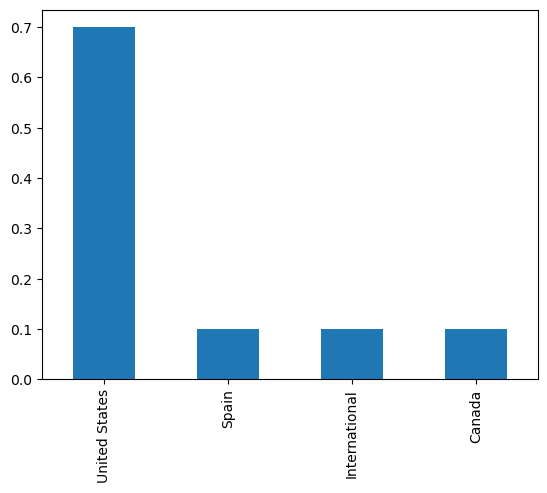

In [36]:
infl_by_country_perc.plot(kind='bar');

In [37]:
inf_posts = top_10[['username','posts']]

In [41]:
inf_posts['posts'].sort_values()

2     890.0
3    1800.0
7    2000.0
0    3300.0
8    4100.0
6    5000.0
5    5600.0
4    6800.0
1    6900.0
9    7400.0
Name: posts, dtype: float64

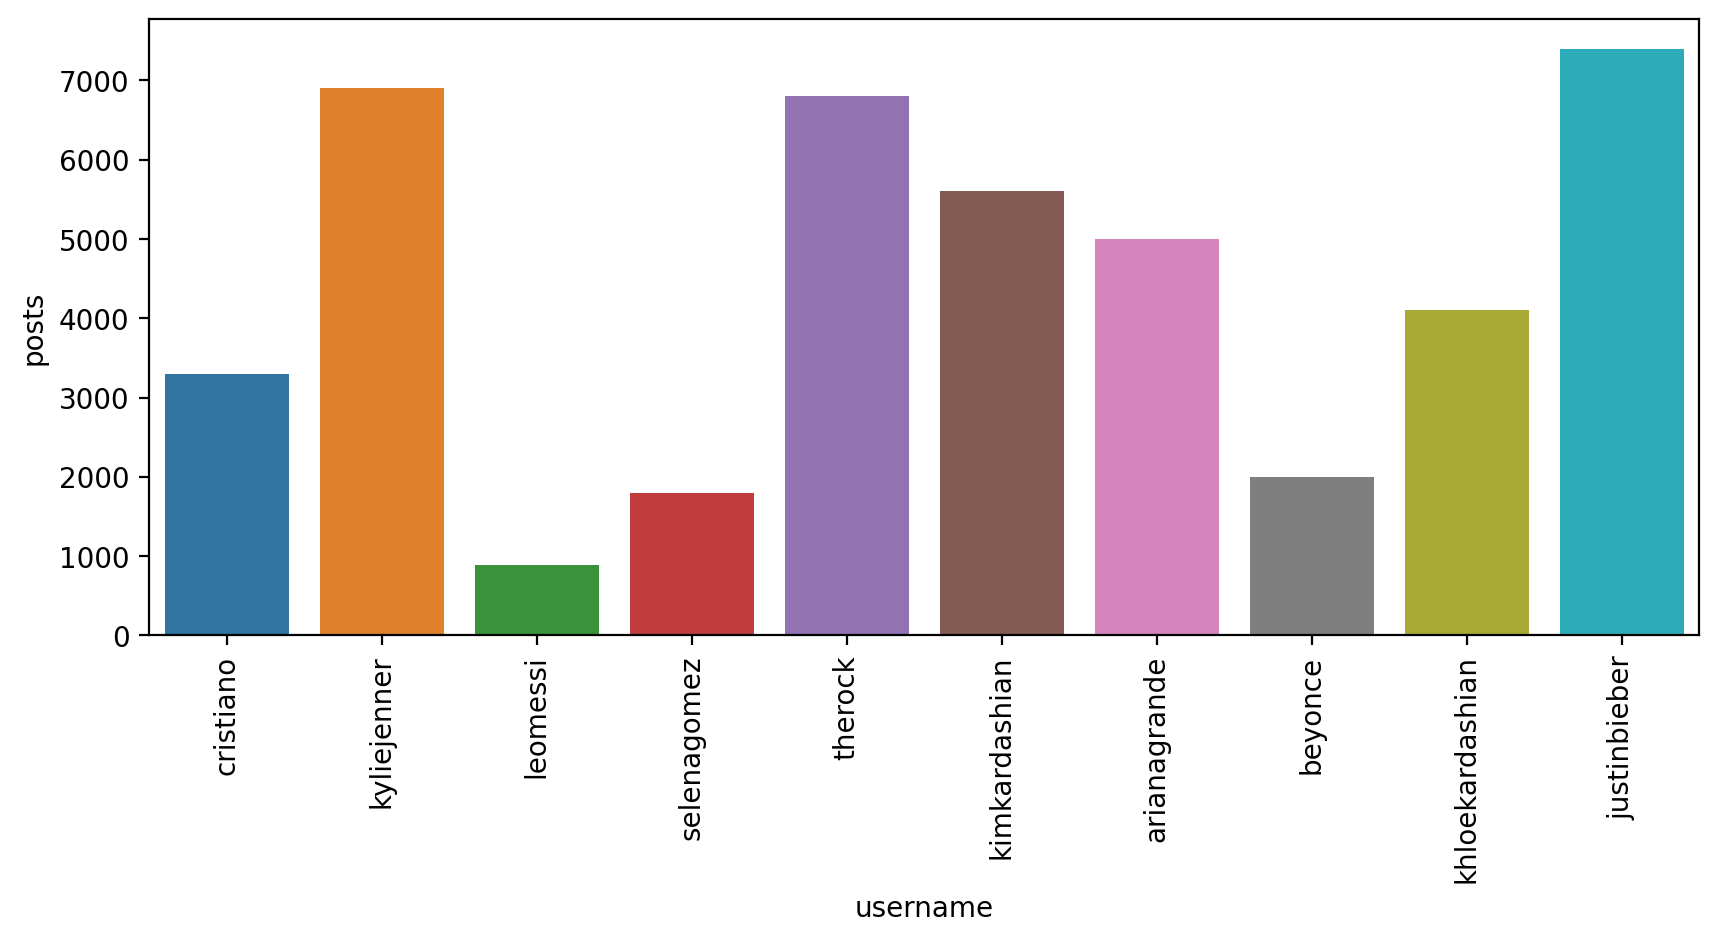

In [40]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=inf_posts,x='username',y='posts')
plt.xticks(rotation=90);

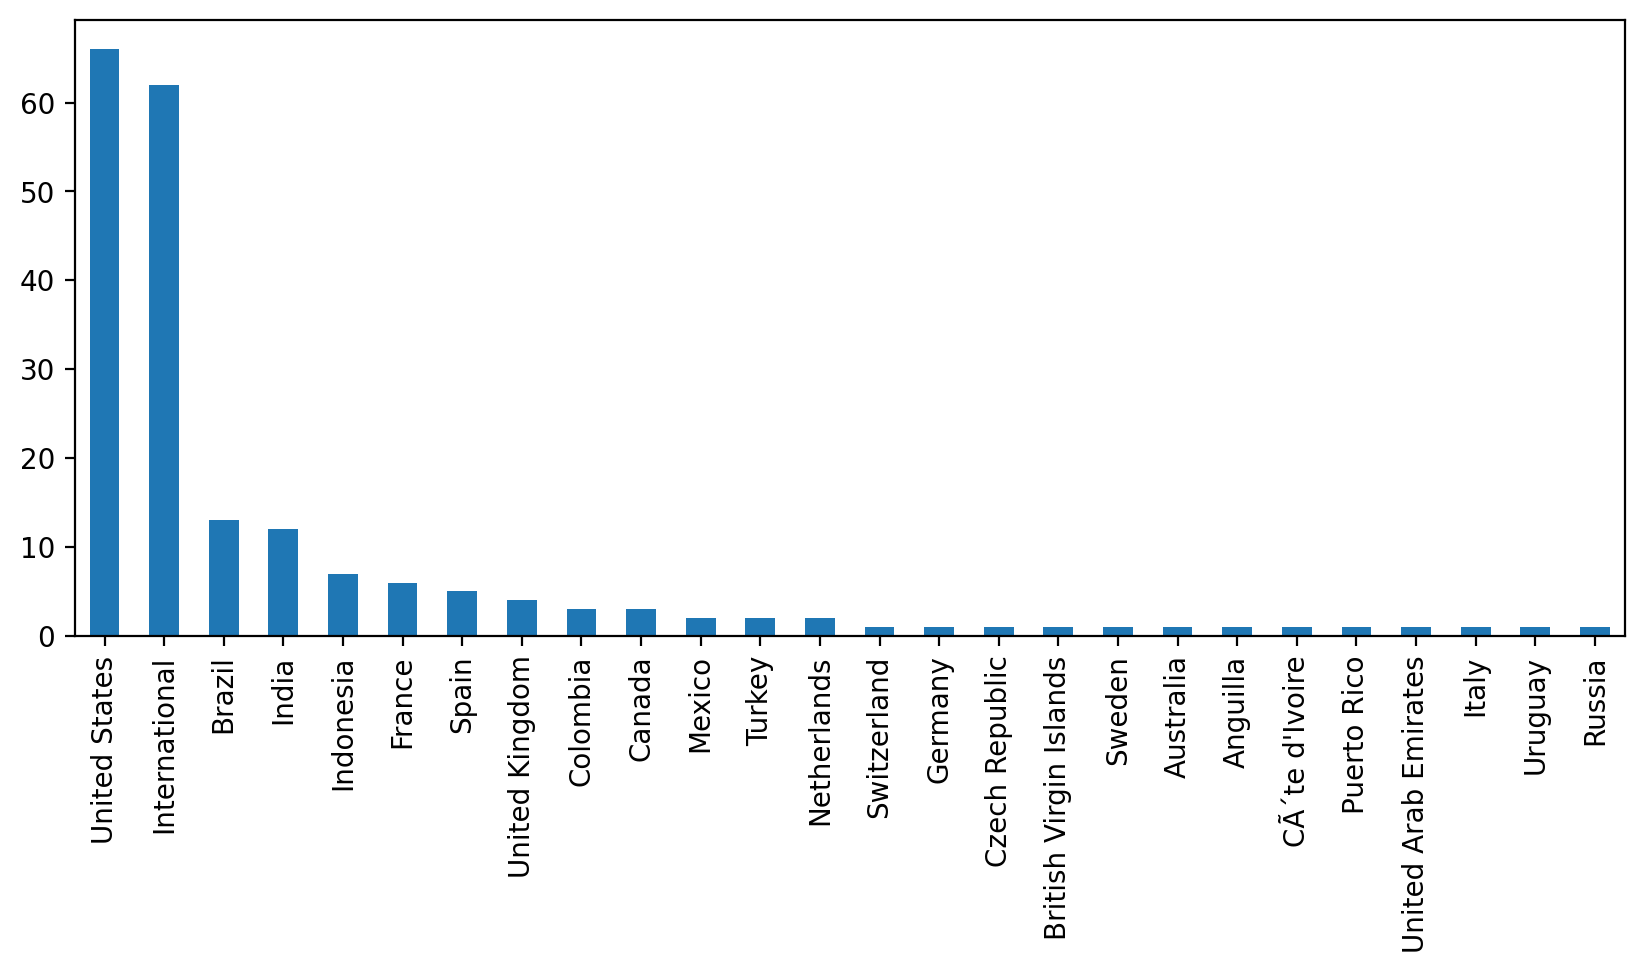

In [45]:
plt.figure(figsize=(10,4),dpi=200)
df['country'].value_counts().plot(kind='bar');

In [50]:
df['country'].unique()

array(['Spain', 'United States', 'International', 'Canada', 'Brazil',
       'Netherlands', 'United Kingdom', 'India', 'Uruguay', 'Turkey',
       'Indonesia', 'Colombia', 'France', 'Australia', 'Italy',
       'United Arab Emirates', 'Puerto Rico', "CÃ´te d'Ivoire",
       'Anguilla', 'Switzerland', 'Sweden', 'British Virgin Islands',
       'Czech Republic', 'Mexico', 'Germany', 'Russia'], dtype=object)

In [55]:
us_infl = df[df['country'] == 'United States'].sort_values('rank')
us_infl

,rank,username,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
1,2,kyliejenner,91,6900.0,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,4,selenagomez,93,1800.0,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6800.0,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5600.0,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5000.0,327.7m,3.7m,1.20%,3.9m,18.4b,United States
...,...,...,...,...,...,...,...,...,...,...
186,187,blakelively,80,110.0,34.6m,3.1m,0.02%,0,350.9m,United States
188,189,disney,77,7300.0,34.2m,185.2k,0.44%,132.0k,1.4b,United States
189,190,shaymitchell,83,6300.0,34.1m,732.4k,0.73%,247.5k,4.6b,United States
195,196,iambeckyg,71,2300.0,33.2m,623.8k,1.40%,464.7k,1.4b,United States


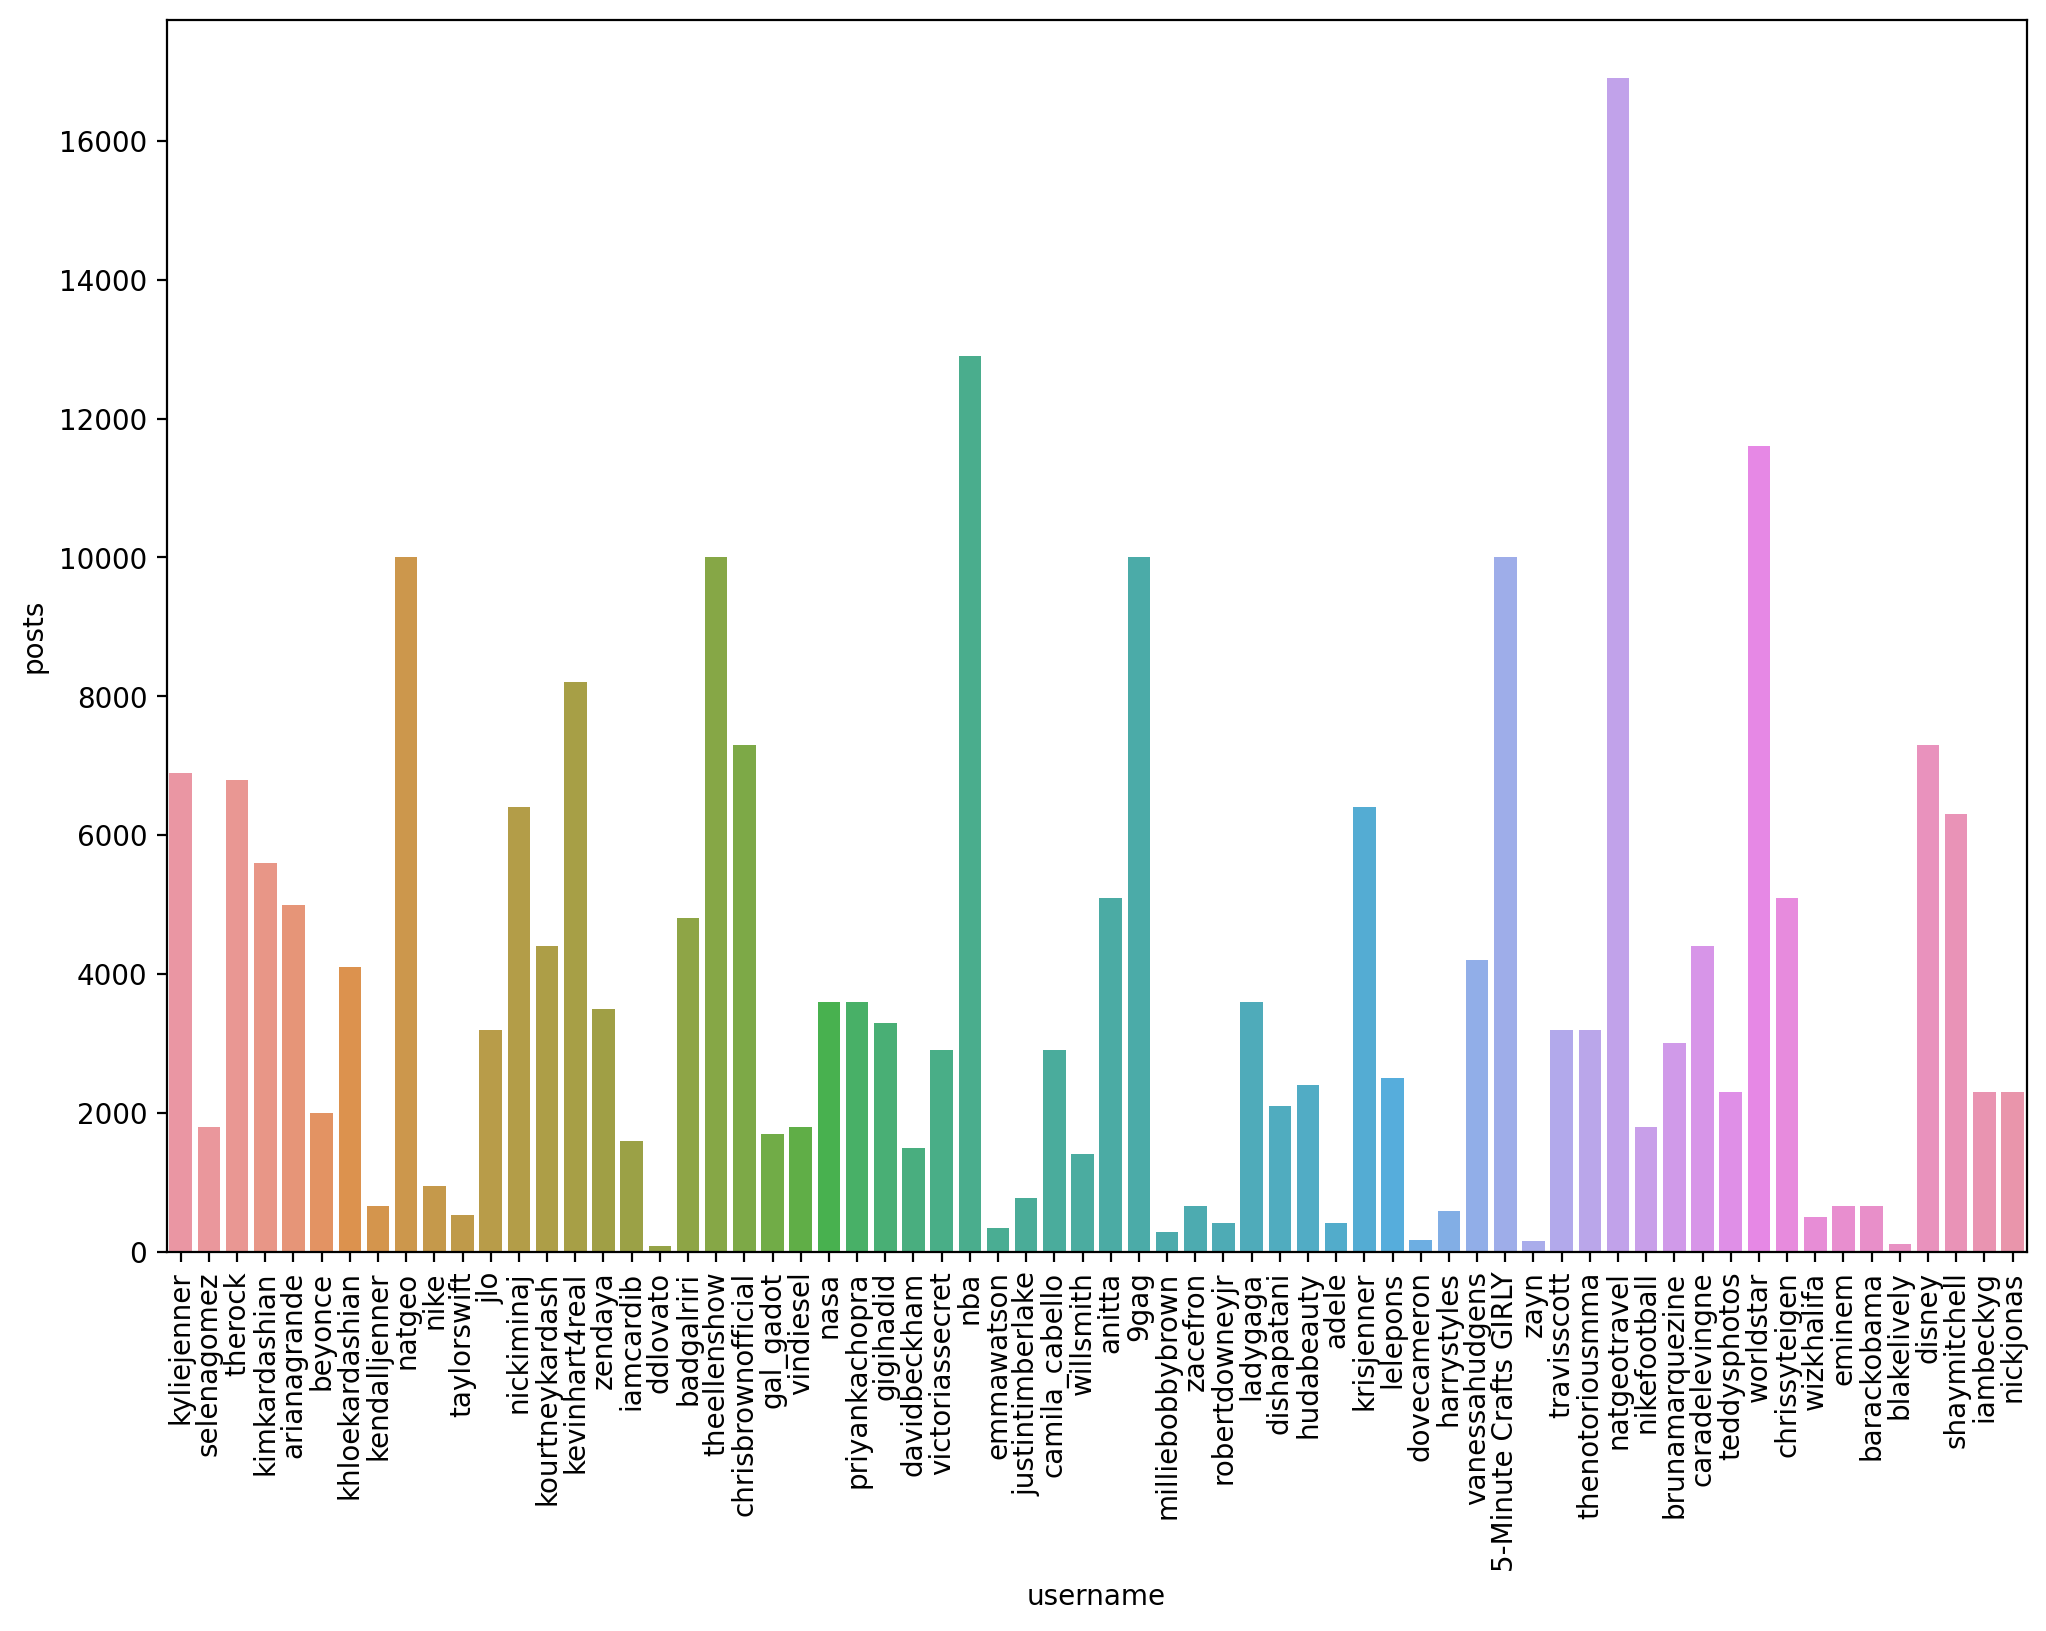

In [60]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=us_infl,x='username',y='posts')
plt.xticks(rotation=90);